In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import os
from efn_util import errorBars

os.chdir('/Users/sbittner/Documents/efn/');

flow_id = 'planar8';
L = 4;
upl = 8;
basedir = '/Users/sbittner/Documents/efn/results/';
fname = basedir + 'M_K_%s_lyrs=%d_upl=%d_tradeoff.npz' % \
                  (flow_id, L, upl);

X = np.load(fname);
Ks = [1, 5, 10];
num_Ks = len(Ks);
Ms = [10, 100, 1000];
num_Ms = len(Ms);
N = 20;
KLs = X['KLs'];
R2s = X['R2s'];
#check_rate = X['check_rate'];
#num_checks = R2s.shape[3];
num_checks = R2s.shape[3]-2;
KLs = KLs[:,:,:,:num_checks];
R2s = R2s[:,:,:,:num_checks];
check_rate = 100;
its = check_rate*np.arange(1,num_checks+1);


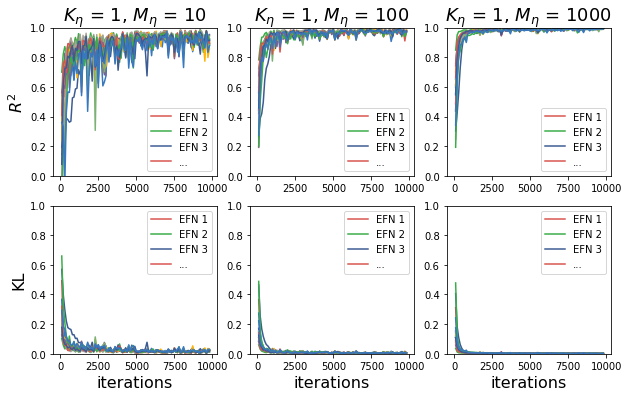

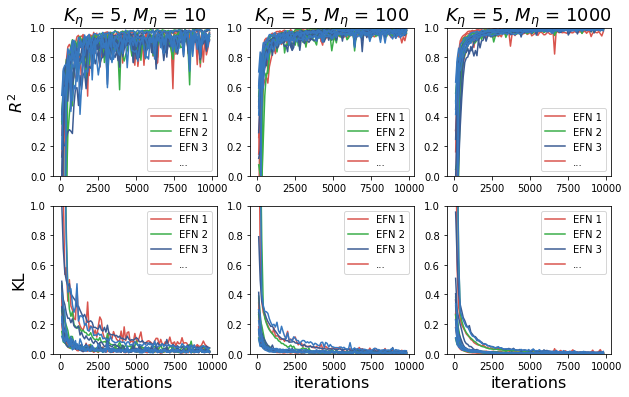

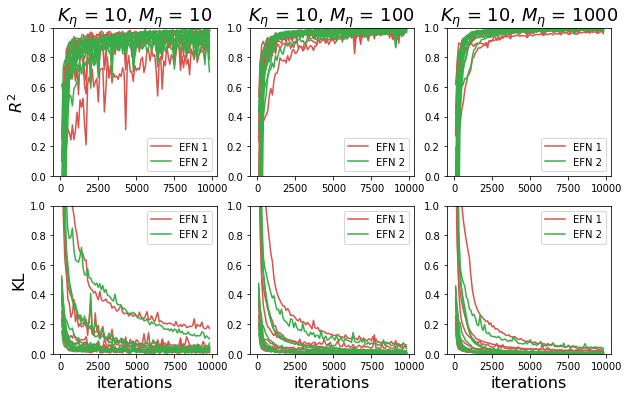

In [2]:
fontsize = 16;
colors = ["pale red", "medium green", "denim blue", "windows blue", "amber", "greyish", "faded green", "dusty purple"];
ncolors = len(colors);
color_palette = sns.xkcd_palette(colors);
for i in range(num_Ks):
    K_eta = Ks[i];
    fig = plt.figure(figsize=(10, 6));
    for j in range(num_Ms):
        M_eta = Ms[j];
        N_k = N // K_eta;
        size = 40*np.ones((num_checks,));
        titlestr = '$K_\eta$ = %d, $M_\eta$ = %d' % (K_eta, M_eta);
        legendstrs = [];
        fig.add_subplot(2,num_Ms,j+1);
        for n in range(0, min(N_k, 3)):
            colorind = np.mod(n, ncolors);
            plt.plot([0,0], [0,0], '-', c=color_palette[colorind]);
        for n in range(0,N_k):
            colorind = np.mod(n, ncolors);
            R2s_ijn = R2s[i,j,(n*K_eta):((n+1)*K_eta),:]
            KLs_ijn = KLs[i,j,(n*K_eta):((n+1)*K_eta),:]
            plt.plot(its, R2s_ijn.T, '-', c=color_palette[colorind]);
            if (j < 1):
                plt.ylabel('$R^2$', fontsize=fontsize)
            plt.title(titlestr, fontsize=fontsize+2)
            if (n < 3):
                legendstrs.append('EFN %d' % (n+1));
            elif (n == 3):
                legendstrs.append('...');
        plt.legend(legendstrs);
        plt.ylim([0, 1]);
        fig.add_subplot(2,num_Ms,num_Ms+j+1);
        for n in range(0, min(N_k, 3)):
            colorind = np.mod(n, ncolors);
            plt.plot([0,0], [0,0], '-', c=color_palette[colorind]);
        for n in range(0,N_k):
            colorind = np.mod(n, ncolors);
            R2s_ijn = R2s[i,j,(n*K_eta):((n+1)*K_eta),:]
            KLs_ijn = KLs[i,j,(n*K_eta):((n+1)*K_eta),:]
            plt.plot(its, KLs_ijn.T, '-', c=color_palette[colorind]);
            plt.xlabel('iterations', fontsize=fontsize);
            if (j < 1):
                plt.ylabel('KL', fontsize=fontsize);
        plt.legend(legendstrs);
        plt.ylim([0, 1]);
        

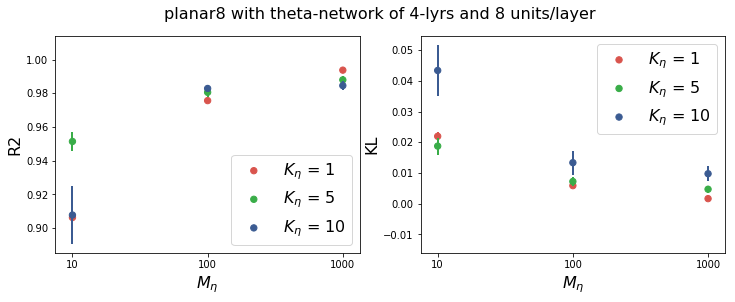

In [12]:
fontsize = 16;
colors = ["pale red", "medium green", "denim blue", "windows blue", "amber", "greyish", "faded green", "dusty purple"];
ncolors = len(colors);
color_palette = sns.xkcd_palette(colors);
mean_R2s = np.zeros((num_Ks, num_Ms));
mean_KLs = np.zeros((num_Ks, num_Ms));
std_R2s = np.zeros((num_Ks, num_Ms));
std_KLs = np.zeros((num_Ks, num_Ms));
for i in range(num_Ks):
    K_eta = Ks[i];
    for j in range(num_Ms):
        M_eta = Ms[j];
        N_k = N // K_eta;
        size = 40*np.ones((num_checks,));
        titlestr = '$K_\eta$ = %d, $M_\eta$ = %d' % (K_eta, M_eta);
        R2s_ij = R2s[i,j,:,-1];
        KLs_ij = KLs[i,j,:,-1];
        mean_R2s[i,j] = np.mean(R2s_ij);
        std_R2s[i,j] = np.std(R2s_ij) / np.sqrt(N);
        mean_KLs[i,j] = np.mean(KLs_ij);
        std_KLs[i,j] = np.std(KLs_ij) / np.sqrt(N);
        
plot_K = 3;
fig = plt.figure(figsize=(12, 4));
ax = fig.add_subplot(1,2,1);
x = np.array(Ms);
legendstrs = [];
for i in range(plot_K):
    K_eta = Ks[i];
    legendstrs.append('$K_\eta$ = %d' % K_eta);
errorBars(np.log10(x), mean_R2s, std_R2s, legendstrs, color_palette);
ax.set_xticks(range(1,num_Ms+1));
ax.set_xticklabels(Ms);
plt.xlabel('$M_\eta$', fontsize=fontsize);
plt.ylabel('R2', fontsize=fontsize);

ax = fig.add_subplot(1,2,2);
errorBars(np.log10(x), mean_KLs, std_KLs, legendstrs, color_palette);
ax.set_xticks(range(1,num_Ms+1));
ax.set_xticklabels(Ms);
plt.xlabel('$M_\eta$', fontsize=fontsize);
plt.ylabel('KL', fontsize=fontsize);
plt.suptitle('%s with theta-network of %d-lyrs and %d units/layer' % (flow_id, L, upl), fontsize=fontsize);

plt.show();